In [1]:
#Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load and Explore the Data

In [4]:
# Load the dataset
data = pd.read_csv('./IMDB Dataset/IMDB Dataset.csv')

# Explore the data
print(data.head())
print(data.info())
print(data['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
# Preprocess the Data

In [8]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = ' '.join(text)  # Join words back into a single string
    return text

# Apply the text cleaning function
data['cleaned_review'] = data['review'].apply(clean_text)

In [9]:
# Train-Test Split

In [10]:
X = data['cleaned_review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert sentiment to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Feature Extraction

In [12]:
# Use TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [13]:
#Train Models

In [14]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [16]:
#Evaluate Models

In [17]:
# Logistic Regression evaluation
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

# Naive Bayes evaluation
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)


In [18]:
#Visualize the Results

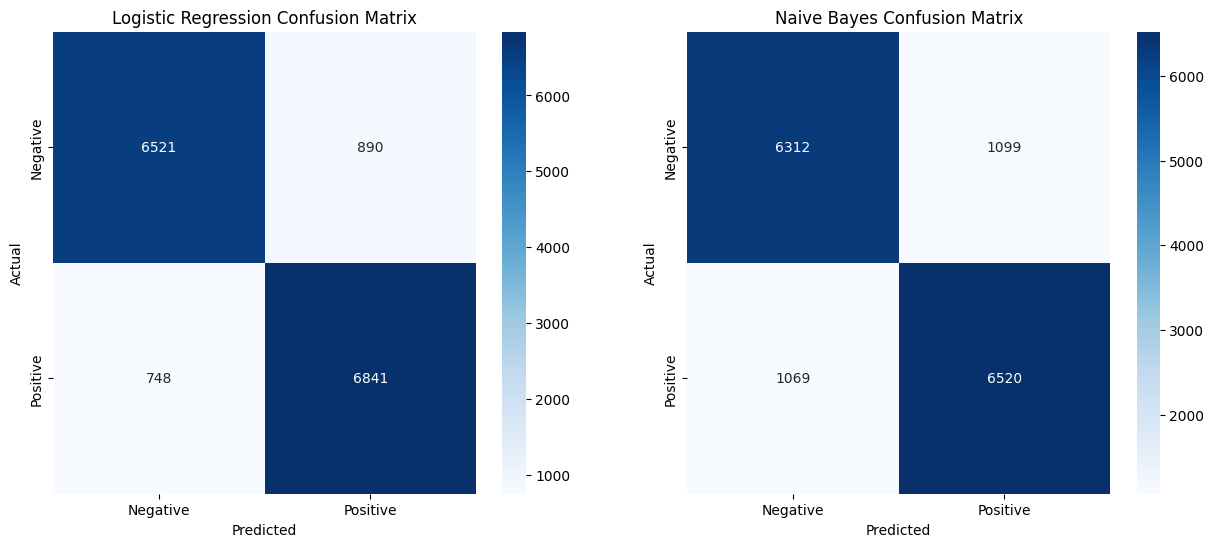

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7411
           1       0.86      0.86      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Logistic Regression Accuracy: 0.89
Naive Bayes Accuracy: 0.86


In [19]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Print classification reports
print("Logistic Regression Classification Report:")
print(class_report_lr)
print("\nNaive Bayes Classification Report:")
print(class_report_nb)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


In [1]:
#Step-by-Step Guide to Implementing Deep Learning Models

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Download stopwords
#nltk.download('stopwords')


In [6]:
# Load the dataset
data = pd.read_csv('./IMDB Dataset/IMDB Dataset.csv')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = ' '.join(text)  # Join words back into a single string
    return text

# Apply the text cleaning function
data['cleaned_review'] = data['review'].apply(clean_text)

# Convert sentiment to binary
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [23]:
# Train-Test Split
X = data['cleaned_review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Feature Extraction with Tokenization

In [24]:
# Tokenization and padding
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [9]:
#Define and Train the Models

In [25]:
from tensorflow.keras.layers import Flatten
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values
y_test = y_test.values

# Define the simple feedforward neural network
model_ffnn = Sequential()
model_ffnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_ffnn.add(Flatten())
model_ffnn.add(Dropout(0.2))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dropout(0.2))
model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_ffnn = model_ffnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)



Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.7224 - loss: 0.5091 - val_accuracy: 0.8767 - val_loss: 0.2865
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.9494 - loss: 0.1403 - val_accuracy: 0.8597 - val_loss: 0.3883
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9940 - loss: 0.0242 - val_accuracy: 0.8614 - val_loss: 0.4992
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.8636 - val_loss: 0.5710
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.8669 - val_loss: 0.6212


In [26]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_lstm.add(Bidirectional(LSTM(64)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 172s 385ms/step - accuracy: 0.7305 - loss: 0.5098 - val_accuracy: 0.8739 - val_loss: 0.3007
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 208s 399ms/step - accuracy: 0.9024 - loss: 0.2524 - val_accuracy: 0.8769 - val_loss: 0.2939
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 132s 302ms/step - accuracy: 0.9283 - loss: 0.1932 - val_accuracy: 0.8721 - val_loss: 0.3263
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 179s 387ms/step - accuracy: 0.9445 - loss: 0.1532 - val_accuracy: 0.8593 - val_loss: 0.3780
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 203s 388ms/step - accuracy: 0.9556 - loss: 0.1278 - val_accuracy: 0.8603 - val_loss: 0.3683


In [27]:
#Evaluate the Models

In [28]:
# Evaluate FFNN
y_pred_ffnn_prob = model_ffnn.predict(X_test_pad)
y_pred_ffnn = (y_pred_ffnn_prob > 0.5).astype("int32")
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
fpr_ffnn, tpr_ffnn, _ = roc_curve(y_test, y_pred_ffnn_prob)
roc_auc_ffnn = roc_auc_score(y_test, y_pred_ffnn_prob)

# Evaluate LSTM
y_pred_lstm_prob = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm_prob)
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm_prob)


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step


In [29]:
#Plot ROC Curves for Comparison

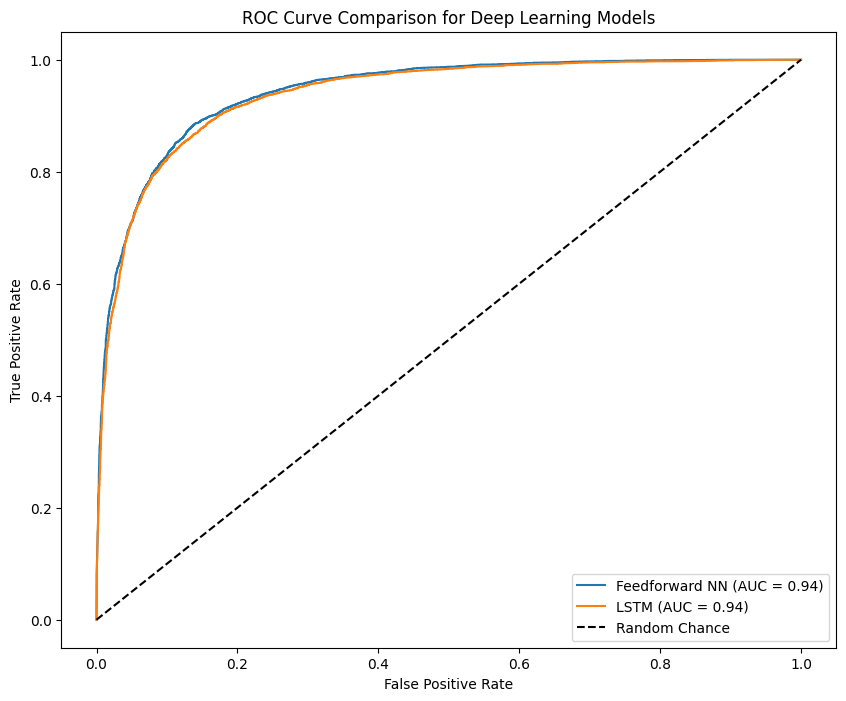

In [30]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_ffnn, tpr_ffnn, label=f'Feedforward NN (AUC = {roc_auc_ffnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Deep Learning Models')
plt.legend(loc='best')
plt.show()
